## Notebook to calculate the spectrum of $\Phi$ values for Tononi et al. 2016 (MAJ+OR+AND+AND)

In [1]:
import pyphi
import numpy as np
from pyphi import phi_spectrum

# Transition probability matrix used in Tononi et al 2016 (Figure 1)

## Little Endian TPM. 
tpm = np.array([
    [0,0,0,0],
    [0,1,0,0],
    [0,0,0,0],
    [1,1,1,0],
    [0,0,0,0],
    [1,1,0,0],
    [1,0,0,0],
    [1,1,1,0],
    [0,1,0,0],
    [0,1,0,0],
    [0,1,0,0],
    [1,1,1,0],
    [0,1,0,1],
    [1,1,0,1],
    [1,1,0,1],
    [1,1,1,1]
])

# Set up network object
network = pyphi.Network(tpm, node_labels=['A','B','C','D'])
print("Network = ",network.node_labels)

# Put the system into a given state
state = (1,1,1,0)
nodes = ['A','B','C']

## Get the requisite Subsystem
subsystem = pyphi.Subsystem(network, state, nodes)

## What does PyPhi Give? Should be 0.125
pyphi_val = pyphi.compute.phi(subsystem)
print("PyPhi Value = ",pyphi_val)

## Calculate all Phi values
display_CES= False  # if True, output will display constellations
Phi_Spectrum = phi_spectrum.get_phi_spectrum(subsystem,display_CES)

print("\nCuts = ",Phi_Spectrum[0])
print("\nPhi Spectrum = ",Phi_Spectrum[1])

Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]

Network =  NodeLabels(('A', 'B', 'C', 'D'))


PyPhi Value =  0.659722
	Number of Non-unique Constellations = 2016

Evaluating Cut  Cut [A] ━━/ /━━➤ [B, C]
	Number of Non-unique Constellations = 7

Evaluating Cut  Cut [B] ━━/ /━━➤ [A, C]
	Number of Non-unique Constellations = 12

Evaluating Cut  Cut [A, B] ━━/ /━━➤ [C]
	Number of Non-unique Constellations = 14

Evaluating Cut  Cut [C] ━━/ /━━➤ [A, B]
	Number of Non-unique Constellations = 36

Evaluating Cut  Cut [A, C] ━━/ /━━➤ [B]
	Number of Non-unique Constellations = 252

Evaluating Cut  Cut [B, C] ━━/ /━━➤ [A]
	Number of Non-unique Constellations = 1

Cuts =  [Cut [A] ━━/ /━━➤ [B, C], Cut [B] ━━/ /━━➤ [A, C], Cut [A, B] ━━/ /━━➤ [C], Cut [C] ━━/ /━━➤ [A, B], Cut [A, C] ━━/ /━━➤ [B], Cut [B, C] ━━/ /━━➤ [A]]

Phi Spectrum =  [[0.861108, 0.986108, 0.923609, 1.034719, 0.972219, 0.902775, 1.027775, 0.965275, 1.076386, 1.013886, 0.881942, 1.006942, 0.944442, 1.055552, 0.993053, 0.923608, 1.048608, 1.097219, 0.805553, 0.930553, 0.868054, 0.979164, 0.916664, 0.847219, 0.90972, 1.02083

In [6]:
Phi_MIP = phi_spectrum.get_Phi_MIP(Phi_Spectrum)
print("Phi MIP = ",Phi_MIP)
print(len(Phi_MIP))

Phi MIP =  [0.409721 0.409722 0.430553 0.430554 0.430555 0.437499 0.4375   0.451387
 0.451388 0.451389 0.458332 0.458333 0.47222  0.472221 0.472222 0.472223
 0.479165 0.479166 0.486109 0.48611  0.486111 0.493053 0.493054 0.493055
 0.493056 0.499998 0.499999 0.5      0.506942 0.506943 0.506944 0.513886
 0.513887 0.513888 0.513889 0.520831 0.520832 0.520833 0.527776 0.527777
 0.534719 0.53472  0.534721 0.534722 0.534723 0.541664 0.541665 0.541666
 0.548608 0.548609 0.54861  0.548611 0.555552 0.555553 0.555554 0.555555
 0.555556 0.562497 0.562498 0.562499 0.5625   0.569442 0.569443 0.569444
 0.576386 0.576387 0.576388 0.576389 0.58333  0.583331 0.583332 0.583333
 0.590274 0.590275 0.590276 0.590277 0.590278 0.597219 0.59722  0.597221
 0.597222 0.604164 0.604165 0.604166 0.611108 0.611109 0.61111  0.611111
 0.618052 0.618053 0.618054 0.618055 0.618056 0.624997 0.624998 0.624999
 0.625    0.631941 0.631942 0.631943 0.631944 0.638885 0.638886 0.638887
 0.638888 0.638889 0.64583  0.645831 0.6

In [3]:
from fontTools.ttLib import TTFont
import matplotlib.font_manager as mfm

## Choose a font that renders the cut symbol properly
def char_in_font(Unicode_char, font):
    for cmap in font['cmap'].tables:
        if cmap.isUnicode():
            if ord(Unicode_char) in cmap.cmap:
                return True
    return False


uni_char = "\u27A4"

font_info = [(f.fname, f.name) for f in mfm.fontManager.ttflist]
for i, font in enumerate(font_info):
    if char_in_font(uni_char, TTFont(font[0], fontNumber=0)):
        print(font[0], font[1])

/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf DejaVu Sans Mono
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf DejaVu Sans Mono
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf DejaVu Sans
/Library/Fonts/AppleGothic.ttf AppleGothic
/System/Library/Fonts/LastResort.ttf .LastResort
/System/Library/Fonts/ZapfDingbats.ttf Zapf Dingbats
/Library/Fonts/AppleMyungjo.ttf AppleMyungjo
/Library/Fonts/Arial Unicode.ttf Arial Unicode MS


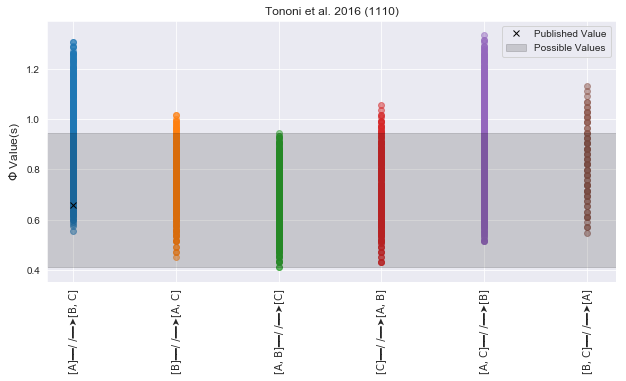

In [7]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import seaborn as sns
from pyphi import models
sns.set_style('darkgrid')
%matplotlib inline

## UTF Characters
LINE = "\u2501"
CUT_SYMBOL = LINE * 2 + "/ /" + LINE * 2 + "\u27A4"

## Set Font
# font_path = '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
font_path = '/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
font = mfm.FontProperties(fname=font_path) # find this font

## Initialize fig, ax objects
fig = plt.figure(figsize=(8.8,5.4))
ax = plt.subplot(111)

## Plot published value and possible values
plt.plot([0],pyphi_val,'kx',label=r'Published Value')
ax.axhspan(np.min(Phi_MIP), np.max(Phi_MIP), alpha=0.15,color='black',label='Possible Values')
# ax.axhspan(np.min(Phi_MIP), np.max(Phi_MIP), alpha=0.15,color='black',label='Possible $\Phi^{Max}$ Values')

## Scatterplot Phi Values for each cut
x_labels = []
for i in range(len(Phi_Spectrum[0])):
    cut = Phi_Spectrum[0][i]
    
    ## Get label for cut
    from_nodes = models.fmt.fmt_mechanism(cut.from_nodes, cut.node_labels)
    to_nodes = models.fmt.fmt_mechanism(cut.to_nodes, cut.node_labels)
    cut_label = from_nodes+CUT_SYMBOL+to_nodes
    
    ## Plot
    plt.scatter([i]*len(Phi_Spectrum[1][i]),Phi_Spectrum[1][i],alpha=0.5)
    x_labels.append(cut_label)
    
## Clean Up
plt.title('Tononi et al. 2016 (1110)')
plt.ylabel(r'$\Phi$ Value(s)',fontsize=12)
plt.xticks(range(len(Phi_Spectrum[0])),x_labels,rotation=90,fontproperties=font)
# plt.ylim((0.0,1.0))
plt.legend()
# plt.legend(ncol=1,bbox_to_anchor = [1.25,1.0],prop=font,fontsize=12)
plt.tight_layout()
plt.savefig("TONONI_2016.pdf")
plt.show()